The extracted number is: 8.0


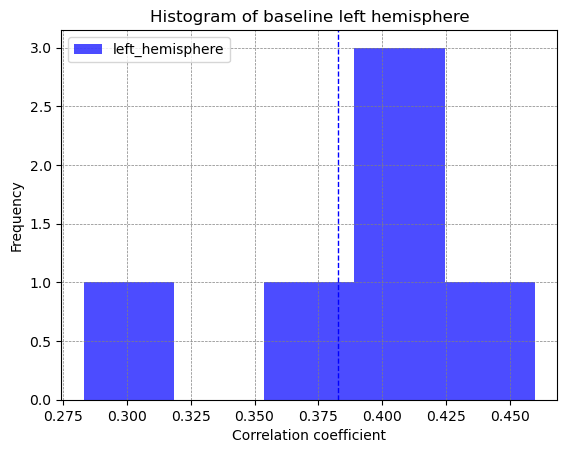

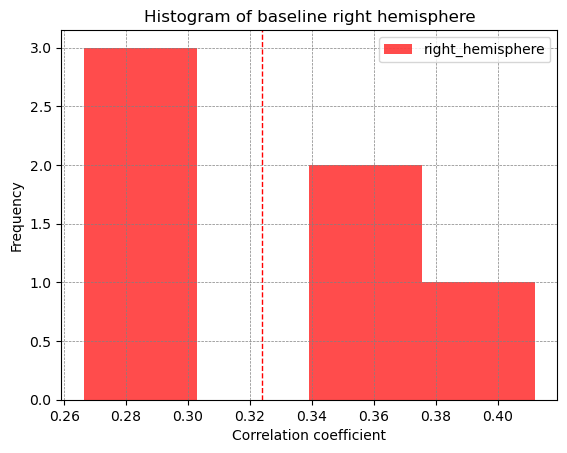

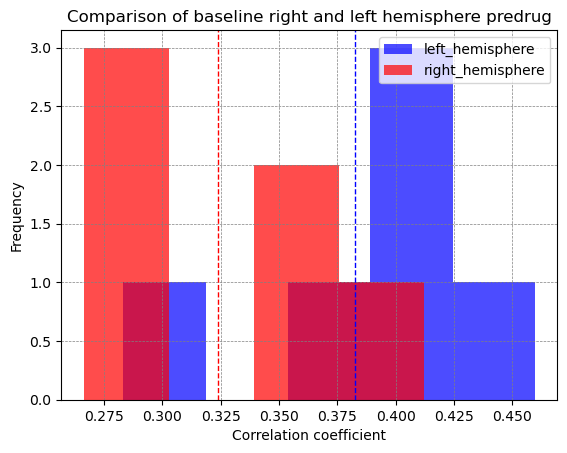

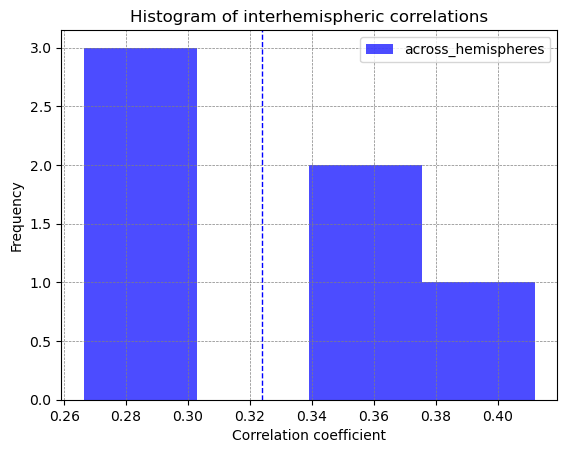

File exists: data/correlation_files/predrug_sub-Linus_epi_CHARM_in_NMT_v2.1_sym_05mm_000.txt


################################################################ SAFETY OUTPUTS #############################################################################################


Boundaries for the left hemisphere:
CL_CL Row Range: 6 to 10.0
CL_CL Column Range: 6 to 4.0
Boundaries for the right hemisphere:
CR_CR Row Range: 10.0 to 14.0
CR_CR Column Range: 4.0 to 8.0
Boundaries for both hemispheres:
CR_CL Row Range: 10.0 to 14.0
CR_CL Column Range: 6 to 4.0


Variable Verification:
number_begin: 6, number_half: 4.0, number_max: 8.0
matrix_half: 10.0, matrix_max: 14.0


Data after boundary setting, exemplified by the left hemisphere:
Number of tuples in CL_CL: 4
Sample tuple from CL_CL: [(1.0, 0.4596, 0.3604, 0.3903), (0.4596, 1.0, 0.2833, 0.4125), (0.3604, 0.2833, 1.0, 0.3897)]
Length of CL_CL_values: 10


Length before sorting:
Before sorting - CL: 10, CR: 10, CR_CL: 16


Frequency counts in CL_

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import re
import os
import decimal
from collections import Counter

# Setting general variables
# please insert here your file names
file_predrug = "data/correlation_files/predrug_sub-Linus_epi_CHARM_in_NMT_v2.1_sym_05mm_000.txt"

# extract number of ROIs which is in line one in every netcc (here txt) file
def extract_number_from_first_line(file_predrug):  # predrug because number should be the same in both files
    with open(file_predrug, 'r') as file: 
        # just read the first line
        first_line = file.readline()
        
        match = re.search(r'\d+', first_line)  
        
        if match:
            return float(match.group())  # extrate number and give it back as float
        else:
            raise ValueError("No number was found in this line")

try:
    number = extract_number_from_first_line(file_predrug)
    print(f"The extracted number is: {number}")
    
    # declare variables 
    matrix_half = (number / 2) + 6   # half lines of CC
    matrix_max = number + 6          # max. lines of CC
    number_half = (number / 2)       # half columns of CC
    number_max = number           # max. columns of CC
    number_begin = 6                 # begin of lines

    # CL-CL; predrug
    CL_CL = []
    with open(file_predrug, 'rt') as myfile:  
        for i, line in enumerate(myfile, start=1):
            if i <= number_begin:
                continue
            if i > matrix_half:
                break
            line = line.strip()
            if not line:
                continue
            parts = line.split()
            # generate dynamical columns
            tuple_values = [float(parts[int(i)]) for i in np.arange(0, number_half)]

          #  add tuple to CL_CL
            if len(tuple_values) == number_half:
               CL_CL.append(tuple(tuple_values))       

    # Extract all values from the tuples into flat lists
    CL_CL_values = [value for tup in CL_CL for value in tup]

    #CR-CR; predrug
    CR_CR = []
    with open (file_predrug, 'rt') as myfile:  
        for i, line in enumerate(myfile, start=1):  
            if i <= matrix_half:  
               continue
            if i > matrix_max:  
               break
            line = line.strip()               
            if not line:
               continue
            parts = line.split()
            tuple_values = [float(parts[int(i)]) for i in np.arange(number_half, number_max)]

          # add tuple to CR_CR
            if len(tuple_values) == (number_max - number_half):
               CR_CR.append(tuple(tuple_values))   
                
    # Extract all values from the tuples into flat lists
    CR_CR_values = [value for tup in CR_CR for value in tup]
    
    #CR-CL; predrug
    CR_CL = []
    with open (file_predrug, 'rt') as myfile:  
        for i, line in enumerate(myfile, start=1):  
            if i <= matrix_half:  
               continue
            if i > matrix_max:  
               break
            line = line.strip()               
            if not line:
               continue
            parts = line.split()
            tuple_values = [float(parts[int(i)]) for i in np.arange(0, number_half)]

          # add tuple to CR_CL
            if len(tuple_values) == number_half:
               CR_CL.append(tuple(tuple_values)) 
    # Extract all values from the tuples into flat lists
    CR_CL_values = [value for tup in CR_CL for value in tup]

    def reduce_frequencies(values):
        counts = Counter(values)  # Count the frequencies
        new_values = []
        
        for val, count in counts.items():
            if val == 1.0:
                new_values.extend([val] * count)  # 1.0 should always remain
            elif count == 2:
                new_values.append(val)  # For frequency 2, only one instance remains
            else:
                reduced_count = -(-count // 2)  # Halve the count, rounding up (e.g., 5 → 3, 6 → 3)
                new_values.extend([val] * reduced_count)
        
        return np.array(new_values)
        
    # Apply frequency reduction directly to the original variables
    CL_CL_values = reduce_frequencies(CL_CL_values)
    CR_CR_values = reduce_frequencies(CR_CR_values)
    
    sorted_values_CL = np.sort(CL_CL_values)
    sorted_values_CR = np.sort(CR_CR_values)
    sorted_values_CRCL = np.sort(CR_CL_values)

    cl_counts = Counter(CL_CL_values)
    cr_counts = Counter(CR_CR_values)
    crcl_counts = Counter(CR_CL_values)
    
    # Excluding values == 1
    filtered_values_CL = sorted_values_CL[sorted_values_CL != 1.0]
    filtered_values_CR = sorted_values_CR[sorted_values_CR != 1.0]
    filtered_values_CRCL = sorted_values_CRCL[sorted_values_CRCL != 1.0]

    
    # Create histogram for CL_CL
    plt.figure()
    plt.hist(filtered_values_CL, bins='auto', alpha=0.7, label='left_hemisphere', color='blue')
    plt.axvline(np.mean(filtered_values_CL), color='blue', linestyle='dashed', linewidth=1)
    plt.title('Histogram of baseline left hemisphere')
    plt.xlabel('Correlation coefficient')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
    #plt.savefig("Histogram_Pin_base_left.png")
    plt.show()

    # create diagram for CR_CR
    plt.figure()
    plt.hist(filtered_values_CR, bins='auto', alpha=0.7, label='right_hemisphere', color='red')
    plt.axvline(np.mean(filtered_values_CR), color='red', linestyle='dashed', linewidth=1)
    plt.title('Histogram of baseline right hemisphere')
    plt.xlabel('Correlation coefficient')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
    #plt.savefig("Histogram_Pin_base_right.png")
    plt.show()

    # create histogram for both data
    plt.hist(filtered_values_CL, bins='auto', alpha=0.7, label='left_hemisphere', color='blue')
    plt.hist(filtered_values_CR, bins='auto', alpha=0.7, label='right_hemisphere', color='red')
    plt.axvline(np.mean(filtered_values_CL), color='blue', linestyle='dashed', linewidth=1)
    plt.axvline(np.mean(filtered_values_CR), color='red', linestyle='dashed', linewidth=1)
    plt.title('Comparison of baseline right and left hemisphere predrug')
    plt.xlabel('Correlation coefficient')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
    #plt.savefig("Histogram_Pin_base_comp.png")
    plt.show()      

    # create diagram for CR_CL
    plt.figure()
    plt.hist(filtered_values_CR, bins='auto', alpha=0.7, label='across_hemispheres', color='blue')
    plt.axvline(np.mean(filtered_values_CR), color='blue', linestyle='dashed', linewidth=1)
    plt.title('Histogram of interhemispheric correlations')
    plt.xlabel('Correlation coefficient')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
    #plt.savefig("Histogram_Pin_CR_CL.png")
    plt.show()

except FileNotFoundError:
    print("File was not found.")
except ValueError as e:
    print(e)
except Exception as e:
    print(f"An unexpected error has occurred: {e}")

if os.path.exists(file_predrug):
    print(f"File exists: {file_predrug}")
else:
    print(f"File not found: {file_predrug}")

# Safety Outputs
print("\n")
print("\033[1m################################################################ SAFETY OUTPUTS #############################################################################################\033[0m")
print("\n")

print("\033[1mBoundaries for the left hemisphere:\033[0m")
print(f"\033[1mCL_CL Row Range:\033[0m {number_begin} to {matrix_half}")
print(f"\033[1mCL_CL Column Range:\033[0m {number_begin} to {number_half}")
print("\033[1mBoundaries for the right hemisphere:\033[0m")
print(f"\033[1mCR_CR Row Range:\033[0m {matrix_half} to {matrix_max}")
print(f"\033[1mCR_CR Column Range:\033[0m {number_half} to {number_max}")
print("\033[1mBoundaries for both hemispheres:\033[0m")
print(f"\033[1mCR_CL Row Range:\033[0m {matrix_half} to {matrix_max}")
print(f"\033[1mCR_CL Column Range:\033[0m {number_begin} to {number_half}")
print("\n")

print("\033[1mVariable Verification:\033[0m")
print(f"\033[1mnumber_begin:\033[0m {number_begin}, \033[1mnumber_half:\033[0m {number_half}, \033[1mnumber_max:\033[0m {number_max}")
print(f"\033[1mmatrix_half:\033[0m {matrix_half}, \033[1mmatrix_max:\033[0m {matrix_max}")
print("\n")

print("\033[1mData after boundary setting, exemplified by the left hemisphere:\033[0m")
print(f"\033[1mNumber of tuples in CL_CL:\033[0m {len(CL_CL)}")
print(f"\033[1mSample tuple from CL_CL:\033[0m {CL_CL[:3]}")  # Displays the first 3 tuples
print(f"\033[1mLength of CL_CL_values:\033[0m {len(CL_CL_values)}")
print("\n")

print("\033[1mLength before sorting:\033[0m")
print(f"\033[1mBefore sorting - CL:\033[0m {len(CL_CL_values)}, \033[1mCR:\033[0m {len(CR_CR_values)}, \033[1mCR_CL:\033[0m {len(CR_CL_values)}")
print("\n")

print("\033[1mFrequency counts in CL_CL_values (after reduction):\033[0m", cl_counts)
print("\033[1mFrequency counts in CR_CR_values (after reduction):\033[0m", cr_counts)
print("\033[1mFrequency counts in CR_CL_values (after reduction):\033[0m", crcl_counts)
print("\n")

print("\033[1mLength excluding duplicate comparisons:\033[0m")
print(f"\033[1mLength of unique values (left hemisphere):\033[0m {len(sorted_values_CL)}")
print(f"\033[1mLength of unique values (right hemisphere):\033[0m {len(sorted_values_CR)}")
print(f"\033[1mLength of unique values (right and left hemisphere):\033[0m {len(sorted_values_CRCL)}")
print("\n")

print("\033[1mLength after sorting, excluding self-comparisons:\033[0m")
print(f"\033[1mLength of left hemisphere:\033[0m {len(filtered_values_CL)}")
print(f"\033[1mLength of right hemisphere:\033[0m {len(filtered_values_CR)}")
print(f"\033[1mLength of right and left hemisphere:\033[0m {len(filtered_values_CRCL)}")



The extracted number is: 8.0


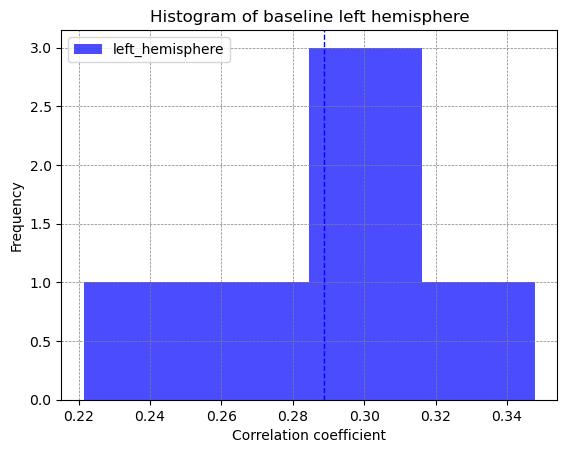

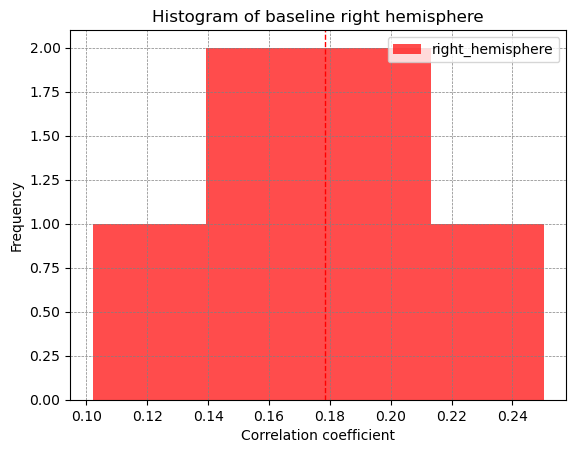

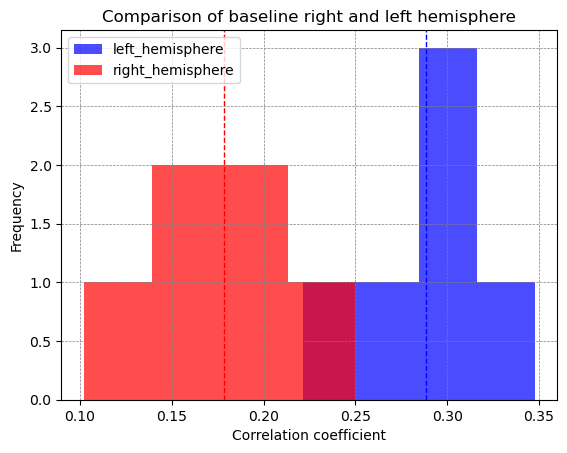

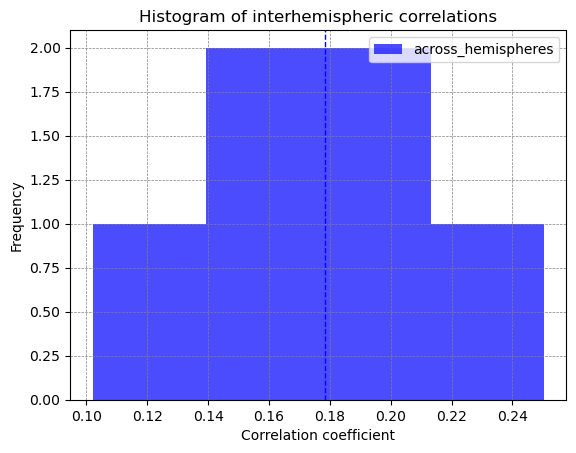

File was not found.
File exists: data/correlation_files/postdrug_sub-Linus_epi_CHARM_in_NMT_v2.1_sym_05mm_000.txt


################################################################ SAFETY OUTPUTS #############################################################################################


Boundaries for the left hemisphere:
CL_CL Row Range: 6 to 10.0
CL_CL Column Range: 6 to 4.0
Boundaries for the right hemisphere:
CR_CR Row Range: 10.0 to 14.0
CR_CR Column Range: 4.0 to 8.0
Boundaries for both hemispheres:
CR_CL Row Range: 10.0 to 14.0
CR_CL Column Range: 6 to 4.0


Variable Verification:
number_begin: 6, number_half: 4.0, number_max: 8.0
matrix_half: 10.0, matrix_max: 14.0


Data after boundary setting, exemplified by the left hemisphere:
Number of tuples in CL_CL: 4
Sample tuple from CL_CL: [(1.0, 0.3478, 0.311, 0.2215), (0.3478, 1.0, 0.2603, 0.2933), (0.311, 0.2603, 1.0, 0.2978)]
Length of CL_CL_values: 10


Length before sorting:
Before sorting - CL: 10, CR: 10, CR_CL: 16


Freq

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import re
import os
import decimal
from collections import Counter

# Setting general variables
# please insert here your file names
file_postdrug = "data/correlation_files/postdrug_sub-Linus_epi_CHARM_in_NMT_v2.1_sym_05mm_000.txt"

# extract number of ROIs which is in line one in every netcc (here txt) file
def extract_number_from_first_line(file_postdrug):  # predrug because number should be the same in both files
    with open(file_postdrug, 'r') as file: 
        # just read the first line
        first_line = file.readline()
        
        match = re.search(r'\d+', first_line)  
        
        if match:
            return float(match.group())  # extrate number and give it back as float
        else:
            raise ValueError("No number was found in this line")

try:
    number = extract_number_from_first_line(file_postdrug)
    print(f"The extracted number is: {number}")
    
    # declare variables 
    matrix_half = (number / 2) + 6   # half lines of CC
    matrix_max = number + 6          # max. lines of CC
    number_half = (number / 2)       # half columns of CC
    number_max = number           # max. columns of CC
    number_begin = 6                 # begin of lines

    # CL-CL; postdrug
    CL_CL_postdrug = []
    with open(file_postdrug, 'rt') as myfile:  
        for i, line in enumerate(myfile, start=1):
            if i <= number_begin:
                continue
            if i > matrix_half:
                break
            line = line.strip()
            if not line:
                continue
            parts = line.split()
            # generate dynamical columns
            tuple_values = [float(parts[int(i)]) for i in np.arange(0, number_half)]

          #  add tuple to CL_CL
            if len(tuple_values) == number_half:
               CL_CL_postdrug.append(tuple(tuple_values))       

    # Extract all values from the tuples into flat lists
    CL_CL_values_postdrug = [value for tup in CL_CL_postdrug for value in tup]


    #CR-CR; postdrug
    CR_CR_postdrug = []
    with open (file_postdrug, 'rt') as myfile:  
        for i, line in enumerate(myfile, start=1):  
            if i <= matrix_half:  
               continue
            if i > matrix_max:  
               break
            line = line.strip()               
            if not line:
               continue
            parts = line.split()
            tuple_values = [float(parts[int(i)]) for i in np.arange(number_half, number_max)]

          # add tuple to CR_CR_postdrug
            if len(tuple_values) == (number_max - number_half):
               CR_CR_postdrug.append(tuple(tuple_values))   
                
    # Extract all values from the tuples into flat lists
    CR_CR_values_postdrug = [value for tup in CR_CR_postdrug for value in tup]
    
    #CR-CL; postdrug
    CR_CL_postdrug = []
    with open (file_postdrug, 'rt') as myfile:  
        for i, line in enumerate(myfile, start=1):  
            if i <= matrix_half:  
               continue
            if i > matrix_max:  
               break
            line = line.strip()               
            if not line:
               continue
            parts = line.split()
            tuple_values = [float(parts[int(i)]) for i in np.arange(0, number_half)]

          # add tuple to CR_CL
            if len(tuple_values) == number_half:
               CR_CL_postdrug.append(tuple(tuple_values)) 
    # Extract all values from the tuples into flat lists
    CR_CL_values_postdrug = [value for tup in CR_CL_postdrug for value in tup]

    def reduce_frequencies(values):
        counts = Counter(values)  # Count the frequencies
        new_values = []
        
        for val, count in counts.items():
            if val == 1.0:
                new_values.extend([val] * count)  # 1.0 should always remain
            elif count == 2:
                new_values.append(val)  # For frequency 2, only one instance remains
            else:
                reduced_count = -(-count // 2)  # Halve the count, rounding up (e.g., 5 → 3, 6 → 3)
                new_values.extend([val] * reduced_count)
        
        return np.array(new_values)
        
    # Apply frequency reduction directly to the original variables
    CL_CL_values_postdrug = reduce_frequencies(CL_CL_values_postdrug)
    CR_CR_values_postdrug = reduce_frequencies(CR_CR_values_postdrug)
    
    sorted_values_CL_postdrug = np.sort(CL_CL_values_postdrug)
    sorted_values_CR_postdrug = np.sort(CR_CR_values_postdrug)
    sorted_values_CRCL_postdrug = np.sort(CR_CL_values_postdrug)

    cl_counts_postdrug = Counter(CL_CL_values_postdrug)
    cr_counts_postdrug = Counter(CR_CR_values_postdrug)
    crcl_counts_postdrug = Counter(CR_CL_values_postdrug)
    
    # Excluding values == 1
    filtered_values_CL_postdrug = sorted_values_CL_postdrug[sorted_values_CL_postdrug != 1.0]
    filtered_values_CR_postdrug = sorted_values_CR_postdrug[sorted_values_CR_postdrug != 1.0]
    filtered_values_CRCL_postdrug = sorted_values_CRCL_postdrug[sorted_values_CRCL_postdrug != 1.0]
    
    # Create histogram for CL_CL
    plt.figure()
    plt.hist(filtered_values_CL_postdrug, bins='auto', alpha=0.7, label='left_hemisphere', color='blue')
    plt.axvline(np.mean(filtered_values_CL_postdrug), color='blue', linestyle='dashed', linewidth=1)
    plt.title('Histogram of baseline left hemisphere')
    plt.xlabel('Correlation coefficient')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
    plt.savefig("Histogram_Lin_base_left.png")
    plt.show()

    # create diagram for CR_CR
    plt.figure()
    plt.hist(filtered_values_CR_postdrug, bins='auto', alpha=0.7, label='right_hemisphere', color='red')
    plt.axvline(np.mean(filtered_values_CR_postdrug), color='red', linestyle='dashed', linewidth=1)
    plt.title('Histogram of baseline right hemisphere')
    plt.xlabel('Correlation coefficient')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
    plt.savefig("Histogram_Lin_base_right.png")
    plt.show()

    # create histogram for both data
    plt.hist(filtered_values_CL_postdrug, bins='auto', alpha=0.7, label='left_hemisphere', color='blue')
    plt.hist(filtered_values_CR_postdrug, bins='auto', alpha=0.7, label='right_hemisphere', color='red')
    plt.axvline(np.mean(filtered_values_CL_postdrug), color='blue', linestyle='dashed', linewidth=1)
    plt.axvline(np.mean(filtered_values_CR_postdrug), color='red', linestyle='dashed', linewidth=1)
    plt.title('Comparison of baseline right and left hemisphere')
    plt.xlabel('Correlation coefficient')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
    plt.savefig("Histogram_Lin_base_comp.png")
    plt.show()      

    # create diagram for CR_CL
    plt.figure()
    plt.hist(filtered_values_CR_postdrug, bins='auto', alpha=0.7, label='across_hemispheres', color='blue')
    plt.axvline(np.mean(filtered_values_CR_postdrug), color='blue', linestyle='dashed', linewidth=1)
    plt.title('Histogram of interhemispheric correlations')
    plt.xlabel('Correlation coefficient')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
    plt.savefig("Histogram_Lin_CR_CL.png")
    plt.show()
#except FileNotFoundError:
    print("File was not found.")
except ValueError as e:
    print(e)
except Exception as e:
    print(f"An unexpected error has occurred: {e}")

if os.path.exists(file_predrug):
    print(f"File exists: {file_postdrug}")
else:
    print(f"File not found: {file_postdrug}") 

    
# Safety Outputs
print("\n")
print("\033[1m################################################################ SAFETY OUTPUTS #############################################################################################\033[0m")
print("\n")

print("\033[1mBoundaries for the left hemisphere:\033[0m")
print(f"\033[1mCL_CL Row Range:\033[0m {number_begin} to {matrix_half}")
print(f"\033[1mCL_CL Column Range:\033[0m {number_begin} to {number_half}")
print("\033[1mBoundaries for the right hemisphere:\033[0m")
print(f"\033[1mCR_CR Row Range:\033[0m {matrix_half} to {matrix_max}")
print(f"\033[1mCR_CR Column Range:\033[0m {number_half} to {number_max}")
print("\033[1mBoundaries for both hemispheres:\033[0m")
print(f"\033[1mCR_CL Row Range:\033[0m {matrix_half} to {matrix_max}")
print(f"\033[1mCR_CL Column Range:\033[0m {number_begin} to {number_half}")
print("\n")

print("\033[1mVariable Verification:\033[0m")
print(f"\033[1mnumber_begin:\033[0m {number_begin}, \033[1mnumber_half:\033[0m {number_half}, \033[1mnumber_max:\033[0m {number_max}")
print(f"\033[1mmatrix_half:\033[0m {matrix_half}, \033[1mmatrix_max:\033[0m {matrix_max}")
print("\n")

print("\033[1mData after boundary setting, exemplified by the left hemisphere:\033[0m")
print(f"\033[1mNumber of tuples in CL_CL:\033[0m {len(CL_CL_postdrug)}")
print(f"\033[1mSample tuple from CL_CL:\033[0m {CL_CL_postdrug[:3]}")  # Displays the first 3 tuples
print(f"\033[1mLength of CL_CL_values:\033[0m {len(CL_CL_values_postdrug)}")
print("\n")

print("\033[1mLength before sorting:\033[0m")
print(f"\033[1mBefore sorting - CL:\033[0m {len(CL_CL_values_postdrug)}, \033[1mCR:\033[0m {len(CR_CR_values_postdrug)}, \033[1mCR_CL:\033[0m {len(CR_CL_values_postdrug)}")
print("\n")

print("\033[1mFrequency counts in CL_CL_values (after reduction):\033[0m", cl_counts_postdrug)
print("\033[1mFrequency counts in CR_CR_values (after reduction):\033[0m", cr_counts_postdrug)
print("\033[1mFrequency counts in CR_CL_values (after reduction):\033[0m", crcl_counts_postdrug)
print("\n")

print("\033[1mLength excluding duplicate comparisons:\033[0m")
print(f"\033[1mLength of unique values (left hemisphere):\033[0m {len(sorted_values_CL_postdrug)}")
print(f"\033[1mLength of unique values (right hemisphere):\033[0m {len(sorted_values_CR_postdrug)}")
print(f"\033[1mLength of unique values (right and left hemisphere):\033[0m {len(sorted_values_CRCL_postdrug)}")
print("\n")

print("\033[1mLength after sorting, excluding self-comparisons:\033[0m")
print(f"\033[1mLength of left hemisphere:\033[0m {len(filtered_values_CL_postdrug)}")
print(f"\033[1mLength of right hemisphere:\033[0m {len(filtered_values_CR_postdrug)}")
print(f"\033[1mLength of right and left hemisphere:\033[0m {len(filtered_values_CRCL_postdrug)}")



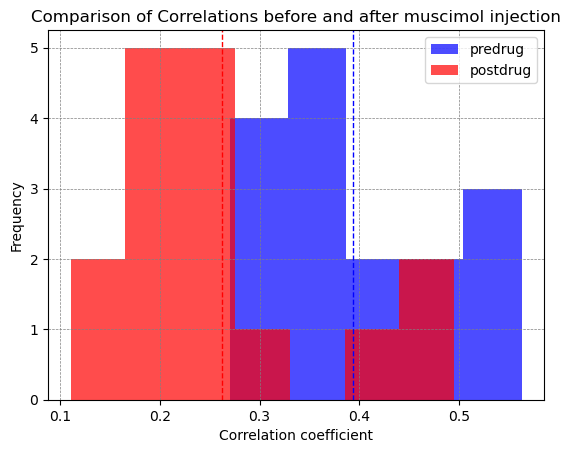

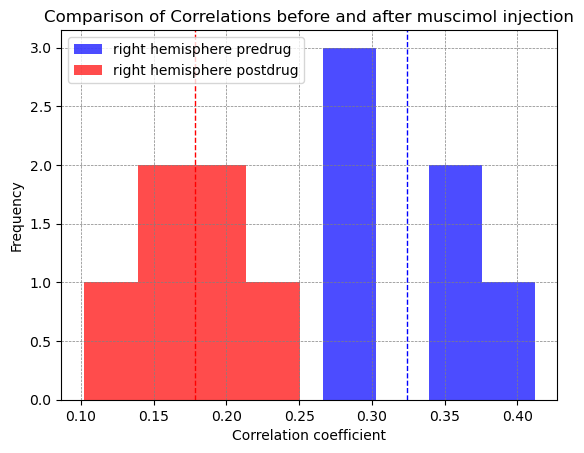

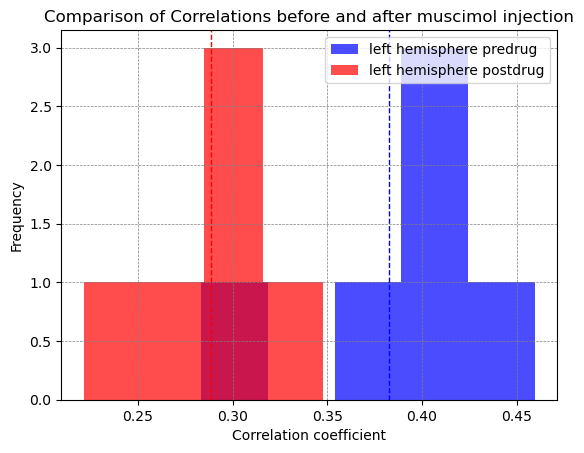

In [8]:
# create histogram for both data
plt.hist(filtered_values_CRCL, bins='auto', alpha=0.7, label='predrug', color='blue')
plt.hist(filtered_values_CRCL_postdrug, bins='auto', alpha=0.7, label='postdrug', color='red')
plt.axvline(np.mean(filtered_values_CRCL), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(np.mean(filtered_values_CRCL_postdrug), color='red', linestyle='dashed', linewidth=1)
plt.title('Comparison of Correlations before and after muscimol injection')
plt.xlabel('Correlation coefficient')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
#plt.savefig("Histogram_corr_prepost_comp.png")
plt.show()  

# create histogram for both data
plt.hist(filtered_values_CR, bins='auto', alpha=0.7, label='right hemisphere predrug', color='blue')
plt.hist(filtered_values_CR_postdrug, bins='auto', alpha=0.7, label='right hemisphere postdrug', color='red')
plt.axvline(np.mean(filtered_values_CR), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(np.mean(filtered_values_CR_postdrug), color='red', linestyle='dashed', linewidth=1)
plt.title('Comparison of Correlations before and after muscimol injection')
plt.xlabel('Correlation coefficient')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
#plt.savefig("Histogram_corr_prepost_comp.png")
plt.show()  

# create histogram for both data
plt.hist(filtered_values_CL, bins='auto', alpha=0.7, label='left hemisphere predrug', color='blue')
plt.hist(filtered_values_CL_postdrug, bins='auto', alpha=0.7, label='left hemisphere postdrug', color='red')
plt.axvline(np.mean(filtered_values_CL), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(np.mean(filtered_values_CL_postdrug), color='red', linestyle='dashed', linewidth=1)
plt.title('Comparison of Correlations before and after muscimol injection')
plt.xlabel('Correlation coefficient')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
#plt.savefig("Histogram_corr_prepost_comp.png")
plt.show()  
